
# Project: Investigating Medical Appointments No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will investigate a dataset that contains information on 100k medical appointments in Brazil, which will provide us with insight into whether or not patients attend their appointments.



In [116]:
# Importing packages we are going to use throughout the project.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we  will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. 



In [117]:
# Loading data and printing out the first 5 lines of the dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning 


> We will start our data cleaning process by checking the columns and its attributes. Also, we will check if we have any null values in the datasets.






In [118]:
# Following Snake case convention for all columns names:

df.rename(columns={'PatientId':'Patient_ID', 'ScheduledDay':'Scheduled_day',
                   'AppointmentDay':'Appointment_day','AppointmentID':'Appointment_ID',
                   'SMS_received':'SMS_received','Handcap':'Handicap', 'No-show': 'No_Show'}, inplace=True)

df.columns
                   

Index(['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_day',
       'Appointment_day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No_Show'],
      dtype='object')

In [119]:
# Exploring the datset further

print(df.describe)
print(df.info())
print(df.shape)


<bound method NDFrame.describe of           Patient_ID  Appointment_ID Gender         Scheduled_day  \
0       2.987250e+13         5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14         5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12         5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11         5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12         5642494      F  2016-04-29T16:07:23Z   
...              ...             ...    ...                   ...   
110522  2.572134e+12         5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12         5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13         5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13         5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14         5629448      F  2016-04-27T13:30:56Z   

             Appointment_day  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   

> We have 110527 rows in the dataset with 14 columns. Most of columns are originally stored as numerical values whether they are integers or floats. Also, It seems that we dont have any null values in the dataset.

> We continue to investigate the columns and check for its dataypes and if there are any duplicates
>> Passing by every column to make sure that its in the correct format and have a look on its values:

In [142]:

#Exploring the number of the unique values:

print('The number of unique Patient IDs is: ' , df['Patient_ID'].nunique())

# There is no reason to have Patient_ID column as float values as its used for identification
# So will change the type to int:

df['Patient_ID'] = df.Patient_ID.astype('int64')

# Setting the Appointment ID column as string as well:

df['Appointment_ID'] = df.Appointment_ID.astype('int64')


# Summary of the IDs columns values:
print('The IDs of the patients can be summarized as follows: ' , df['Patient_ID'].value_counts()) 
print('The IDs of the appointments can be summarized as follows: ' , df['Appointment_ID'].value_counts())





The number of unique Patient IDs is:  62190
The IDs of the patients can be summarized as follows:  822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
871374938638855    62
                   ..
37589497678822      1
31638467315         1
89279955685         1
5883897911366       1
57863365759569      1
Name: Patient_ID, Length: 62190, dtype: int64
The IDs of the appointments can be summarized as follows:  5769215    1
5616924    1
5614879    1
5782829    1
5776686    1
          ..
5711153    1
5717298    1
5709110    1
5707063    1
5771266    1
Name: Appointment_ID, Length: 110327, dtype: int64


In [141]:
# For the scheduled day, We will change the format to date time format:

df.Scheduled_day = pd.to_datetime(df['Scheduled_day'])

# The same for Appointment_day as well as Scheduled day column:

df.Appointment_day = pd.to_datetime(df['Appointment_day'])





In [122]:
# For Gender column:

df.Gender.value_counts() # The majority is for females as we can clearly see.

F    71840
M    38687
Name: Gender, dtype: int64

In [140]:
# For the age column, we check its unique values:

df['Age'].value_counts()

# We notice that we has some strange values inserted for the age column like -1 and 115.
# We will consider the patients with Age equals to 0 as babies.
# The single row which has age equals to 1 will be dropped, considering it as a typo.



df.drop(df[df['Age']==-1].index, inplace=True)

print('The values of the Age column are as follows: ', np.sort(df['Age'].unique()))





The values of the Age column are as follows:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 115]


In [139]:
df.Age.describe() 
# The mean age for the all of patients is 37 years

print('The median age for females is: ', df.query('Gender == "F"')['Age'].median())
print('The median age for males is: ', df.query('Gender == "M"')['Age'].median())


The median age for females is:  39.0
The median age for males is:  33.0


In [138]:
# Exploring the neighborhood column:

print('The number of neighboorhoods is: ', df.Neighbourhood.nunique())

The number of neighboorhoods is:  81


In [124]:
# Exploring Scholarship column:

print(df.Scholarship.value_counts())

# Exploring Hipertension column:

print(df.Hipertension.value_counts())

# Exploring Diabetes column:

print(df.Diabetes.value_counts())

# Exploring Alcoholism column:

print(df.Alcoholism.value_counts())

# Exploring Handicap column:

print(df.Handicap.value_counts())

# We have a pickle here as Handicap columns consists of [0,1,2,3,4] values which somehow confusing as
# 0 should be corresponding to false and 1 to True (Handicapped patients)
# The 2,3 and 4 values will be assumed as mistakes in the data
# So we will drop the rows with Handicap value > 1.

df.drop(df[df['Handicap'] > 1].index, inplace=True)

df.Handicap.value_counts()




0    99666
1    10861
Name: Scholarship, dtype: int64
0    88726
1    21801
Name: Hipertension, dtype: int64
0    102584
1      7943
Name: Diabetes, dtype: int64
0    107167
1      3360
Name: Alcoholism, dtype: int64
0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64


0    108286
1      2042
Name: Handicap, dtype: int64

In [125]:
# Exploring the SMS received column:

print(df.SMS_received.value_counts())

# Exploring the No-show column:

df.No_Show.value_counts()

0    74893
1    35435
Name: SMS_received, dtype: int64


No     88050
Yes    22278
Name: No_Show, dtype: int64

In [126]:
df.head() # Another look of our dataset

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> Now as we executed our data cleaning, We will start to analyze the data we have to answer some questions based on the the visualizations/data we have.

> But first, we will create a new dataframe out of our dataset which just have the patients who showed up to their appointments




In [127]:
df_Show = df.copy() #Making copy of our dataframe fpr patients who actually showed up.
df_Show = df[df['No_Show'] == 'No']
print('The number of records for patients who showed up for their appointments is: ' , df_Show['No_Show'].size)

df_No_Show = df.copy() # Making copy of our dataframe for patients who did not show up.
df_No_Show = df[df['No_Show'] == 'Yes']
print('The number of records for patients who did not show up for their appointments is: ' , df_No_Show['No_Show'].size)



The number of records for patients who showed up for their appointments is:  88050
The number of records for patients who did not show up for their appointments is:  22278




### 1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


<AxesSubplot:title={'center':'Gender of patients who showed up to their appointments'}, ylabel='Count'>

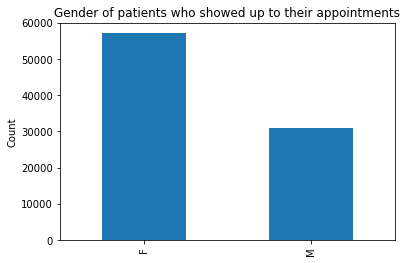

In [128]:
df_Show['Gender'].value_counts().plot(kind='bar',ylabel='Count', 
                                            title='Gender of patients who showed up to their appointments') 
#Most patients who show up for their appointments are female, around 56,000

<AxesSubplot:title={'center':'Patients who received SMS for their appointments'}, ylabel='Count'>

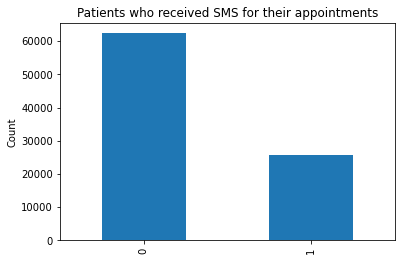

In [129]:
df_Show['SMS_received'].value_counts().plot(kind='bar',ylabel='Count',
                                           title='Patients who received SMS for their appointments')

# Most people who showed up to the appointment did not receive SMS (61,000)

<AxesSubplot:title={'center':'Patients who showed up and diagnosed with Hipertension '}, ylabel='Count'>

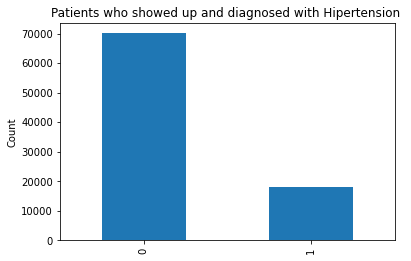

In [130]:
df_Show['Hipertension'].value_counts().plot(kind='bar',ylabel='Count',
                                           title='Patients who showed up and diagnosed with Hipertension ')

#Most people who showed up are not diagnosed with Hopertension (70,000 Patients) compared to Hipertension patients(20,000)

<AxesSubplot:title={'center':'Patients who showed up and signed up for scholarship '}, ylabel='Count'>

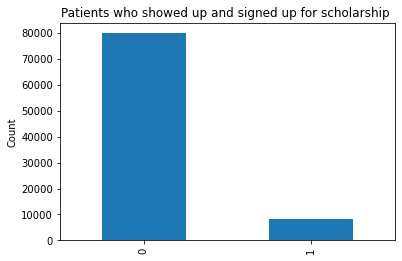

In [131]:
df_Show['Scholarship'].value_counts().plot(kind='bar',ylabel='Count',
                                           title='Patients who showed up and signed up for scholarship ')

# 90% of the patients showed up to their appointments are not signed up to the 'Bolsa Familia program'

<AxesSubplot:title={'center':'Patients who showed up and diagnosed with Diabetes '}, ylabel='Count'>

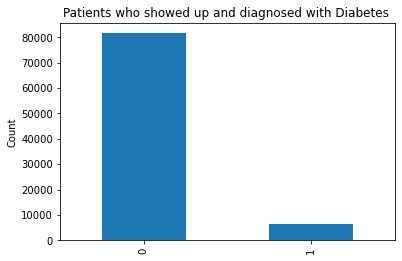

In [132]:
df_Show['Diabetes'].value_counts().plot(kind='bar',ylabel='Count',
                                           title='Patients who showed up and diagnosed with Diabetes ')

# 90% of the patients showed up to their appointments are bot diagnosed with Diabetes

<AxesSubplot:title={'center':'Patients who showed up and Handicapped '}, ylabel='Count'>

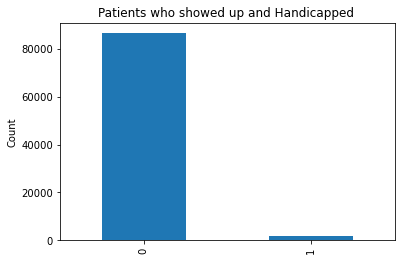

In [133]:
df_Show['Handicap'].value_counts().plot(kind='bar',ylabel='Count',
                                           title='Patients who showed up and Handicapped ')

# Most patients are not handicapped (90,000)

<AxesSubplot:title={'center':'Most Neighbourhoods with patients who showed up '}, ylabel='Count'>

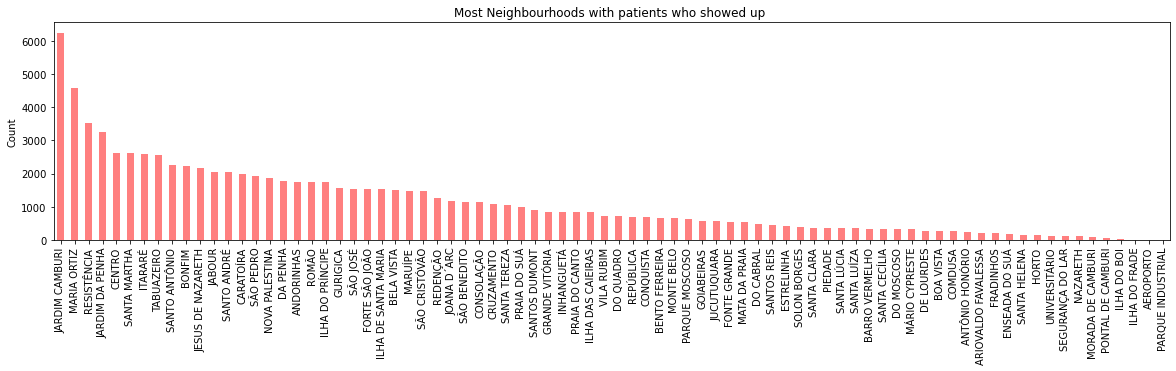

In [134]:
df_Show['Neighbourhood'].value_counts().plot(kind='bar',ylabel='Count',alpha=0.5,color='red',
                                           title='Most Neighbourhoods with patients who showed up ', figsize=(20,4))

# Jardim Camburi and Maria Ortiz are the most Neighbourhoods where the patients show up to their appointments

<AxesSubplot:title={'center':'Patients who showed up and Alcoholic '}, ylabel='Count'>

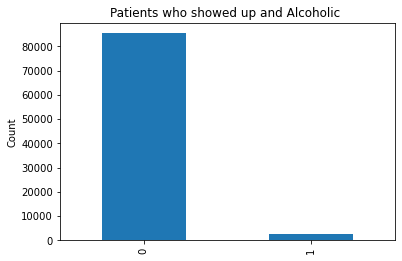

In [135]:
df_Show['Alcoholism'].value_counts().plot(kind='bar',ylabel='Count',
                                           title='Patients who showed up and Alcoholic ')

# 90% of the patients are not alcoholic

<AxesSubplot:title={'center':'Most Age groups who showed up '}, ylabel='Count'>

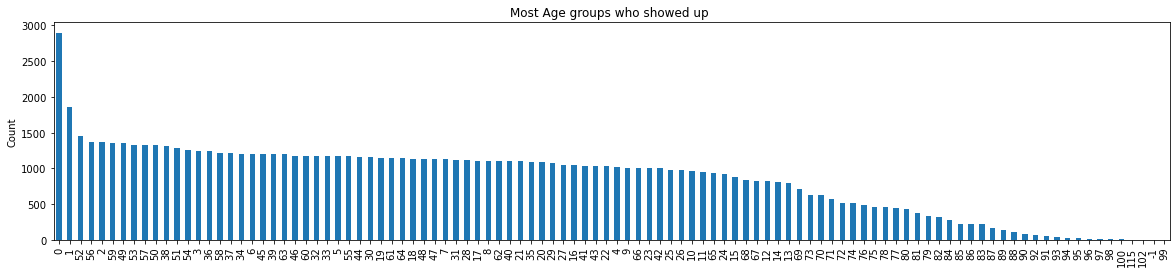

In [136]:
df_Show['Age'].value_counts().plot(kind='bar',ylabel='Count',
                                           title='Most Age groups who showed up ', figsize=(20,4))

# 90% of the patients are not alcoholic

To answer the question of "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?", I guess the factors are as follows:

1- Female patients as well the 0 age group (babies) are the most in terms of attending their appointment, so we can deduce that the female babies are the largest sector of our Show-up patients.

2- SMS has no obvious effect in attending the appointments, most patients (90%) attend whether they received a SMS or not.

3- There is high possibility that patients from Jardim Camburi and Maria Ortiz neighbourhoods do show up for thei appointments.



### 2- Do conditions like Diabetes, Handicap and Hipertension prevent patients from attending the appointments?

In [137]:
# Analyzing the df_No_Show dataframe, we will analyze the reasons which
#prevented some patients from attending their appointments.

df_Diabetes = df_No_Show[df_No_Show['Diabetes'] == 1]
print('The no of patients who Diabetes prevented them for attending their appointment = ', df_Diabetes.Patient_ID.size)

df_Handicap = df_No_Show[df_No_Show['Handicap'] == 1]
print('The no of patients who their Handicap condition prevented them for attending their appointment = ', df_Handicap.Patient_ID.size)

df_Hipertension = df_No_Show[df_No_Show['Hipertension'] == 1]
print('The no of patients who Hipertension prevented them for attending their appointment = ',df_Hipertension.Patient_ID.size)

print('Percentage of Hipertension patients who did not show up = ' ,
      (df_Hipertension.Patient_ID.size/ df_No_Show.Patient_ID.size)*100)

The no of patients who Diabetes prevented them for attending their appointment =  1422
The no of patients who their Handicap condition prevented them for attending their appointment =  366
The no of patients who Hipertension prevented them for attending their appointment =  3748
Percentage of Hipertension patients who did not show up =  16.823772331448065


Actually, It seems none of the mentioned above conditions has big effect in preventing the patients from attending their appointments as we checked the patients who did not show and Hypetension was in lead with 3748 case which is approximately 17% of the total No-show patients.

<a id='conclusions'></a>
## Conclusions

> It seems that the Age, Neigbourhood and Gender are the leading features to predict if a patient will show up to his appointment or not